Code to achieve a completely uncorrelated distribution of the parameters on the chip.
There are 16 (25) resonators in total
In our case the parameters are (all lengths in microns):
1. frequency (inverse length), evenly spaced from 5-11 GHz
2. w
3. s
4. location on the chip, enumerated 1-25


In [1]:
!pip install pandas

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as rd
import time

In [3]:
p = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25] #position
f= np.linspace(5,11,25) #frequency in GHz
w = [4, 11.5, 19, 26.5, 35] #w
s = [4, 8, 12, 16, 20]
w_full= np.tile(w, 5) 
s_full= np.tile(s,5)
    
print(p)
print(f)
print(w)
print(s)


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]
[ 5.    5.25  5.5   5.75  6.    6.25  6.5   6.75  7.    7.25  7.5   7.75
  8.    8.25  8.5   8.75  9.    9.25  9.5   9.75 10.   10.25 10.5  10.75
 11.  ]
[4, 11.5, 19, 26.5, 35]
[4, 8, 12, 16, 20]


Running time 135.02604389190674
Correlation coefficient 0.3764353896814461
       0      1     2     3
0    1.0   8.00  19.0  20.0
1    2.0   7.50   4.0   4.0
2    3.0   8.50  11.5  12.0
3    4.0   8.25  35.0  12.0
4    5.0  10.75  35.0  16.0
5    6.0   8.75  11.5   4.0
6    7.0   5.00  11.5  16.0
7    8.0   5.75  35.0   4.0
8    9.0   6.25  35.0  20.0
9   10.0   7.25  26.5  12.0
10  11.0   7.75   4.0  20.0
11  12.0   5.25  26.5   8.0
12  13.0  10.50  11.5   8.0
13  14.0   6.50  11.5  20.0
14  15.0  11.00  19.0  16.0
15  16.0   5.50   4.0   8.0
16  17.0  10.00  35.0   8.0
17  18.0   9.25  26.5  20.0
18  19.0   6.00  26.5   4.0
19  20.0   9.50  19.0   8.0
20  21.0   9.75   4.0  12.0
21  22.0   9.00  19.0  12.0
22  23.0   6.75  26.5  16.0
23  24.0   7.00   4.0  16.0
24  25.0  10.25  19.0   4.0
          0         1         2         3
0  1.000000  0.150769 -0.099043 -0.070602
1  0.150769  1.000000  0.036409 -0.019612
2 -0.099043  0.036409  1.000000  0.000000
3 -0.070602 -0.019612  0.0000

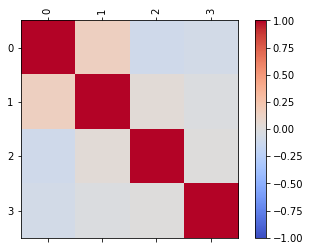

In [4]:
start = time.time()
cc=10
while cc > 1: #loop that ensures that the sum of all correlation coefficients is small
    data = np.zeros((25,4))
    data[:,0] = p

    rd.shuffle(f)
    data[:,1] = f

    rd.shuffle(w_full)
    data[:,2] = w_full

    rd.shuffle(s_full)
    data[:,3] = s_full
    
    #check whether every resonator would have a different combination of w+2s and w/s
    checked = True

    for i in range(25):
        for j in range(25):
            if i != j:
                if data[i,2] == data[j,2] and data[i,3] == data[j,3]:
                    checked = False
                    break

    if checked == True:
        df = pd.DataFrame(data)
        corr = df.corr()
        cc=0
        for i in range(0, len(data[0])):
            for j in range(0, i):
                if i != j:
                    if abs(corr.iloc[i,j]) > 0.2: #makes sure that no individual correlation is large 
                        cc = 10
                        break
                    else:
                        cc += abs(corr.iloc[i,j])
    else:
        continue 
                
end = time.time()
print("Running time", end - start)
print("Correlation coefficient", cc)
print(df)
print(corr)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()

The following cell contains the code that uncorrelates the parameters not only linearly but also quadratically! It checks whether the average correlation is below some value. Furthermore it checks whether all individual correlations are below a certain value.

In [ ]:
cc=100
while cc > 10:
    data = np.zeros((25,8))

    data[:,0] = p
    data[:,4] = np.square(p)

    rd.shuffle(f)
    data[:,1] = f
    data[:,5] = np.square(f)
    
    rd.shuffle(w_full)
    data[:,2] = w_full
    data[:,6] = np.square(w_full)

    rd.shuffle(s_full)
    data[:,3] = s_full
    data[:,7] = np.square(s_full)
    
    #check whether every resonator would have a different combination of w+2s and w/s
    checked = True
    for i in range(25):
        for j in range(25):
            if i != j:
                if data[i,2] == data[j,2] and data[i,3] == data[j,3]:
                    checked = False
                    break
    if checked == True:   
        df = pd.DataFrame(data)
        corr = df.corr()
        cc=0
        for i in range(0,len(data[0])):
            for j in range(0,i):
                if i != j and i+5 != j and i != j+5:
                    if abs(corr.iloc[i,j]) > 0.2: #makes sure that no individual correlation is large 
                        cc = 100
                        break
                    else:
                        cc += abs(corr.iloc[i,j])
    else:
        continue

print("Correlation coefficient", cc)
print(df)
print(corr)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()

The script below gives a different importance to the linear-linear correlations of the parameters, and the linear-quadratic, quadratic-quadratic correlations.

In [ ]:
start = time.time()
cc = False
data = np.zeros((25,8))
while cc == False:
    rd.shuffle(w_full)
    data[:,2] = w_full
    
    rd.shuffle(s_full)
    data[:,3] = s_full
        
    #check whether every resonator would have a different combination of w+2s and w/s
    checked = True
    for i in range(25):
        for j in range(25):
            if i != j:
                if data[i,2] == data[j,2] and data[i,3] == data[j,3]:
                    checked = False
                    break
    
    data[:,6] = np.square(w_full)
    data[:,7] = np.square(s_full)
    data[:,0] = p
    data[:,4] = np.square(p)

    rd.shuffle(f)
    data[:,1] = f
    data[:,5] = np.square(f)

                
    if checked == True:
        df = pd.DataFrame(data)
        corr = df.corr()
        cc = True
        for i in range(0,len(data[0])):
            for j in range(0, i-1):
                if i != j and i+5 != j and i != j+5: #we don't care about the diagnoal autocorrelations.
                    if i <= 4 and j <= 4:
                        if abs(corr.iloc[i,j]) > 0.15:
                            cc = False 
                            break
                    else:
                        if abs(corr.iloc[i,j]) > 0.25: #makes sure that no individual correlation is large 
                            cc = False
                            break
    else:
        continue

end = time.time()
print("Running time", end - start, "seconds")
print(df)
print(corr)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()